In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('customer_churn_data.csv')

# Basic info
print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())

# Missing values
missing = df.isnull().sum()
print("\nMissing Values:\n", missing[missing > 0])

# Summary statistics
print("\nSummary Statistics:\n", df.describe(include='all'))


Shape of dataset: (10000, 24)

Data Types:
 customer_id               object
age                        int64
gender                    object
senior_citizen             int64
partner                   object
dependents                object
tenure                     int64
phone_service             object
multiple_lines            object
internet_service          object
online_security           object
online_backup             object
device_protection         object
tech_support              object
streaming_tv              object
streaming_movies          object
contract                  object
paperless_billing         object
payment_method            object
monthly_charges          float64
total_charges            float64
customer_satisfaction      int64
support_calls              int64
churn                     object
dtype: object

First 5 rows:
    customer_id  age  gender  senior_citizen partner dependents  tenure  \
0  CUST_000001   52    Male               0     Yes        Y

Churn Distribution:
 churn
No     7728
Yes    2272
Name: count, dtype: int64

Churn Rate: 22.72%


/tmp/ipython-input-2703784338.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df, palette='Set2')


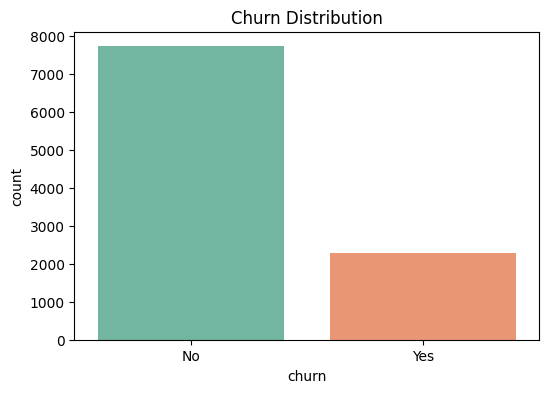

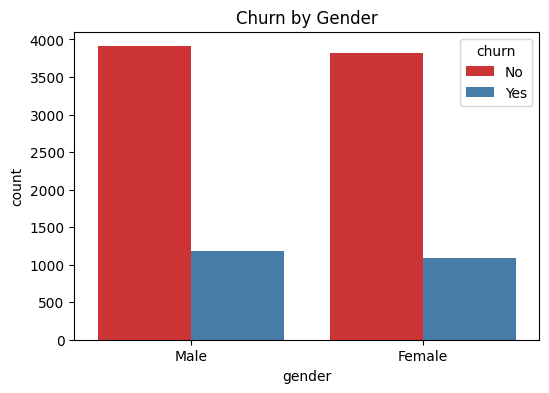

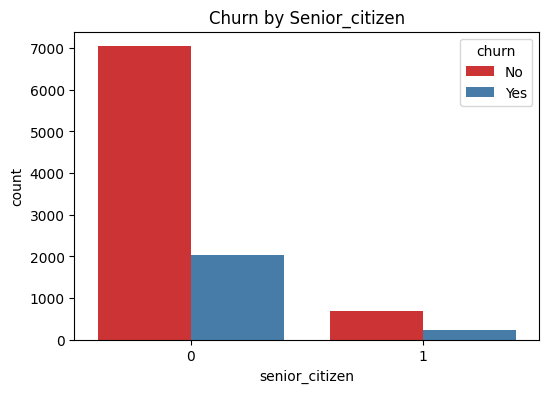

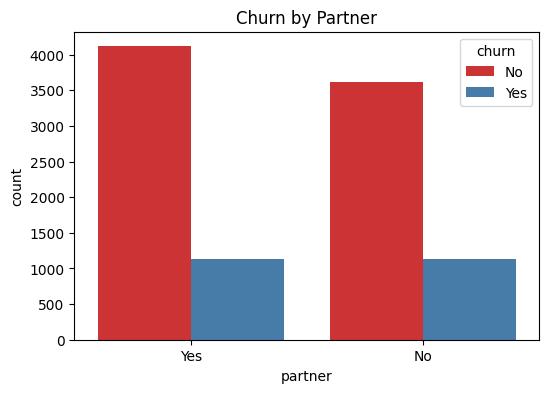

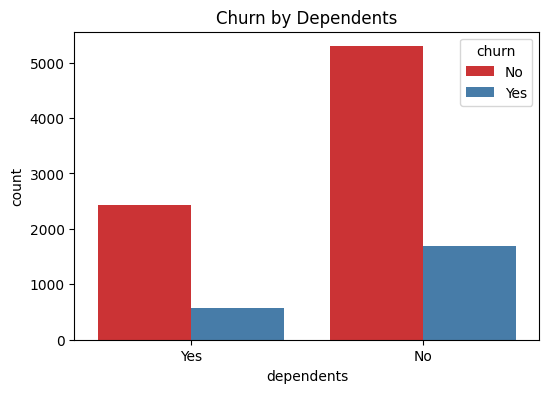

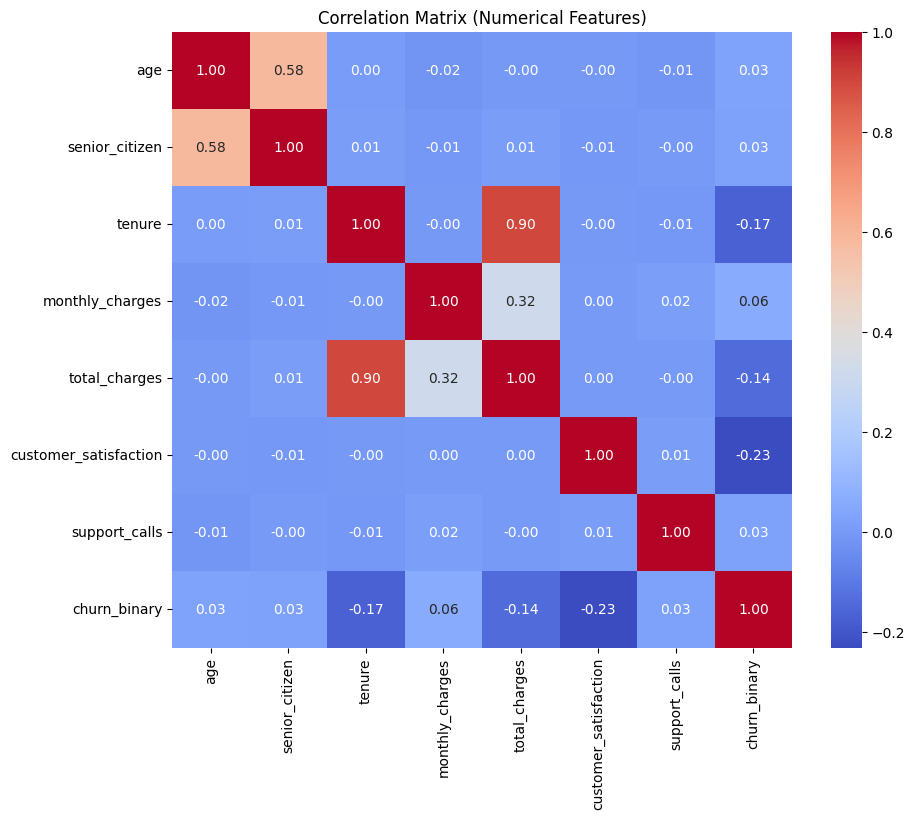

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('customer_churn_data.csv')

# --- 1. Churn Distribution and Churn Rate ---
churn_counts = df['churn'].value_counts()
churn_rate = df['churn'].value_counts(normalize=True)['Yes'] * 100

print("Churn Distribution:\n", churn_counts)
print(f"\nChurn Rate: {churn_rate:.2f}%")

plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df, palette='Set2')
plt.title('Churn Distribution')
plt.show()

# --- 2. Demographic Patterns and Service Usage Impact ---
demographic_features = ['gender', 'senior_citizen', 'partner', 'dependents']
for col in demographic_features:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(x=col, hue='churn', data=df, palette='Set1')
        plt.title(f'Churn by {col.capitalize()}')
        plt.show()

# Corrected service feature names
service_features = ['PhoneService', 'InternetService']
for col in service_features:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(x=col, hue='churn', data=df, palette='Set3')
        plt.title(f'Churn by {col}')
        plt.xticks(rotation=20)
        plt.show()

# --- 3. Financial Factors and Payment Method Effects ---
if 'MonthlyCharges' in df.columns and 'churn' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='churn', y='MonthlyCharges', data=df)
    plt.title('Monthly Charges vs Churn')
    plt.show()

if 'TotalCharges' in df.columns and 'churn' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='churn', y='TotalCharges', data=df)
    plt.title('Total Charges vs Churn')
    plt.show()

if 'PaymentMethod' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='PaymentMethod', hue='churn', data=df)
    plt.xticks(rotation=45)
    plt.title('Churn by Payment Method')
    plt.show()

# --- 4. Correlation Analysis for Numerical Features ---
# Convert churn to binary for correlation
df['churn_binary'] = df['churn'].map({'Yes': 1, 'No': 0})

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'churn_binary' not in numerical_cols:
    numerical_cols.append('churn_binary')

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix (Numerical Features)')
plt.show()


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('customer_churn_data.csv')

# Drop ID column if it exists
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

# Check for and convert TotalCharges if present
if 'TotalCharges' in df.columns:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing values
df = df.dropna()

# Encode target variable
df['churn'] = df['churn'].map({'Yes': 1, 'No': 0})

# Separate features and target
X = df.drop('churn', axis=1)
y = df['churn']

# Identify column types
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (8000, 10032)
Test shape: (2000, 10032)


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv('customer_churn_data.csv')

# Drop customer ID if present
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

# Convert TotalCharges to numeric if exists
if 'TotalCharges' in df.columns:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing values
df = df.dropna()

# Encode target
df['churn'] = df['churn'].map({'Yes': 1, 'No': 0})

# Encode categorical variables
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Features and target
X = df.drop('churn', axis=1)
y = df['churn']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_acc = accuracy_score(y_test, log_model.predict(X_test))

# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
dt_acc = accuracy_score(y_test, dt_model.predict(X_test))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf_model.predict(X_test))

# SVM
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
svm_acc = accuracy_score(y_test, svm_model.predict(X_test))

# Print results
print("Logistic Regression Accuracy:", log_acc)
print("Decision Tree Accuracy:", dt_acc)
print("Random Forest Accuracy:", rf_acc)
print("SVM Accuracy:", svm_acc)


Logistic Regression Accuracy: 0.7895
Decision Tree Accuracy: 0.787
Random Forest Accuracy: 0.795
SVM Accuracy: 0.777



Logistic Regression
Accuracy:  0.7895
Precision: 0.6222
Recall:    0.1850
F1-Score:  0.2852


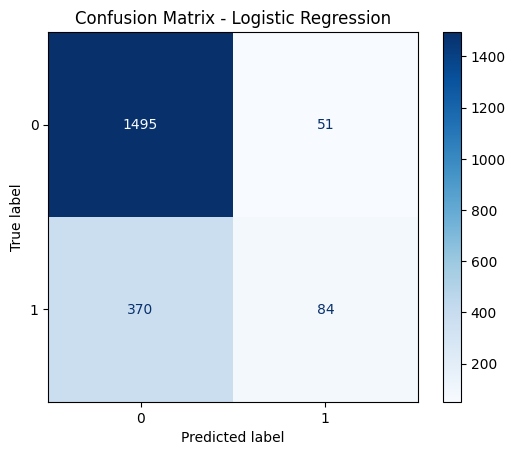


Decision Tree
Accuracy:  0.7870
Precision: 0.5722
Recall:    0.2445
F1-Score:  0.3426


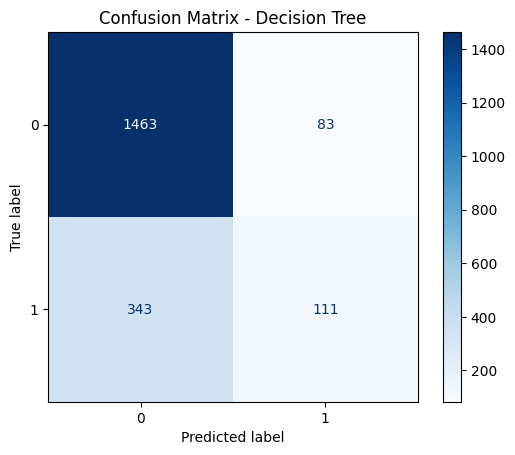


Random Forest
Accuracy:  0.7950
Precision: 0.6410
Recall:    0.2203
F1-Score:  0.3279


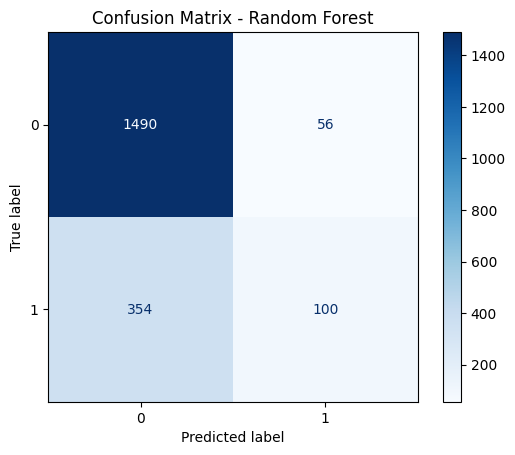


SVM
Accuracy:  0.7770
Precision: 0.5571
Recall:    0.0859
F1-Score:  0.1489


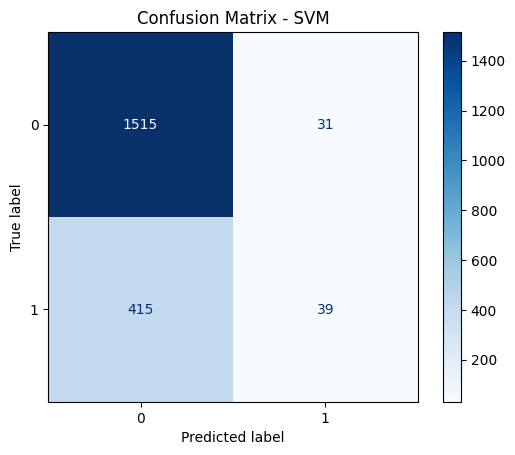

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

models = {
    'Logistic Regression': log_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'SVM': svm_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n{name}")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-Score:  {f1:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
